Anna Wojciechowska, Peniche, January 2023  
test details:   
**salt water test in Atlantic Ocean**  
date: 14th January  2023  16:18- 16:30  
place: Peniche Harbour  
GPS: 39.353452 Lat -9.372495 Lon   

air pressure 3 m abouve water level  
1029. - 1003 [hPa] [WH-0180 meteo station](https://www.bruksanvisningpdf.no/clas-ohlson/wh-1080/bruksanvisning?p=3)  

sensor data  (absolute pressure)
[cm] - [mbar]  
0    - 1017  
100  - 1110  
200  - 1211  
300  - 1308  
400  - 1408  
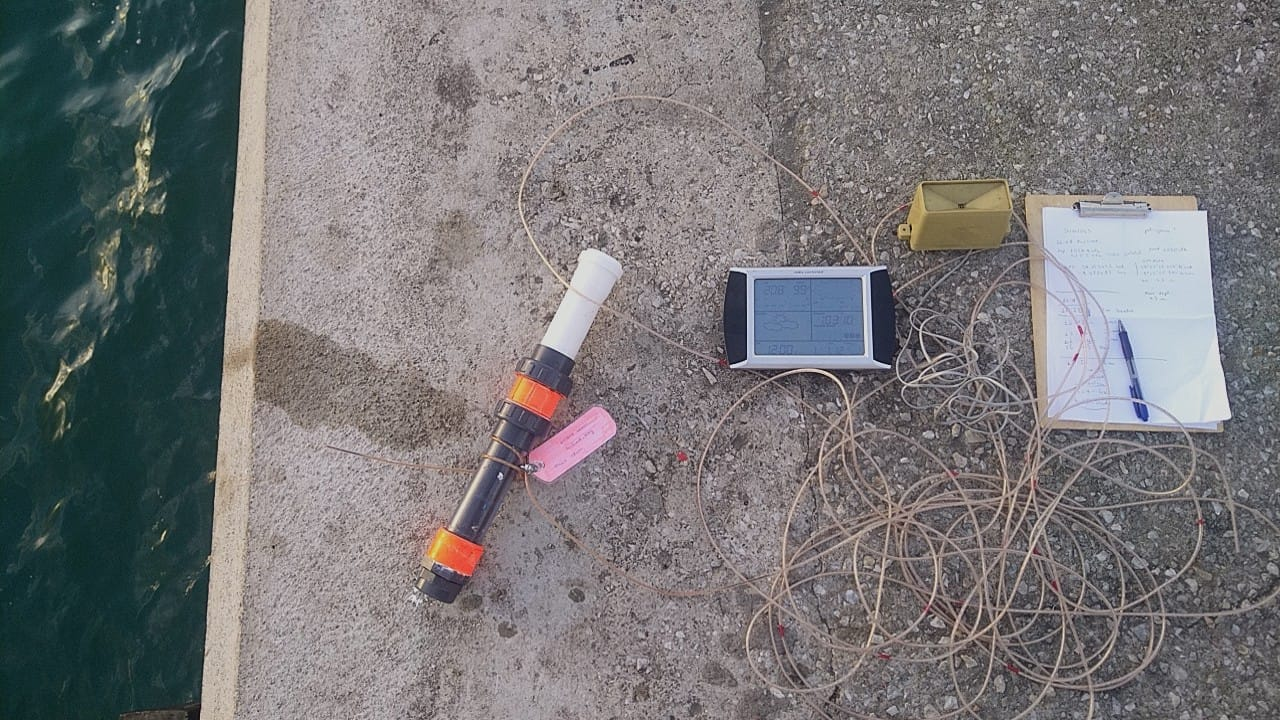  


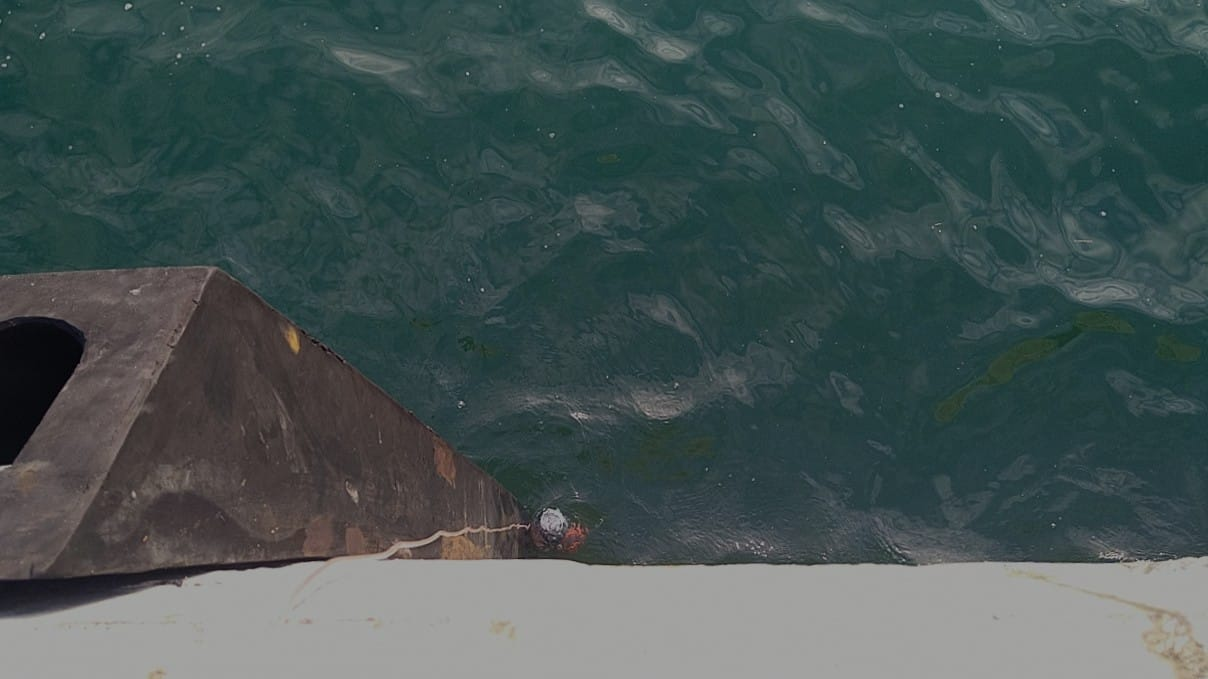

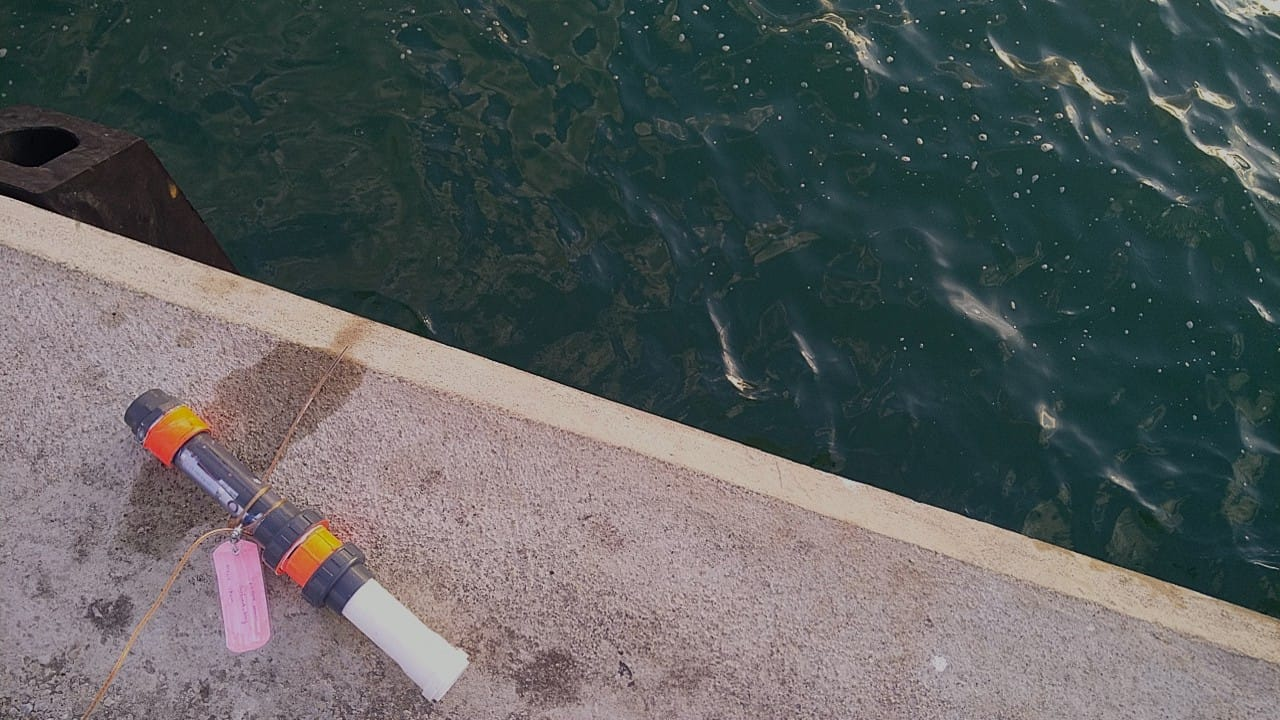

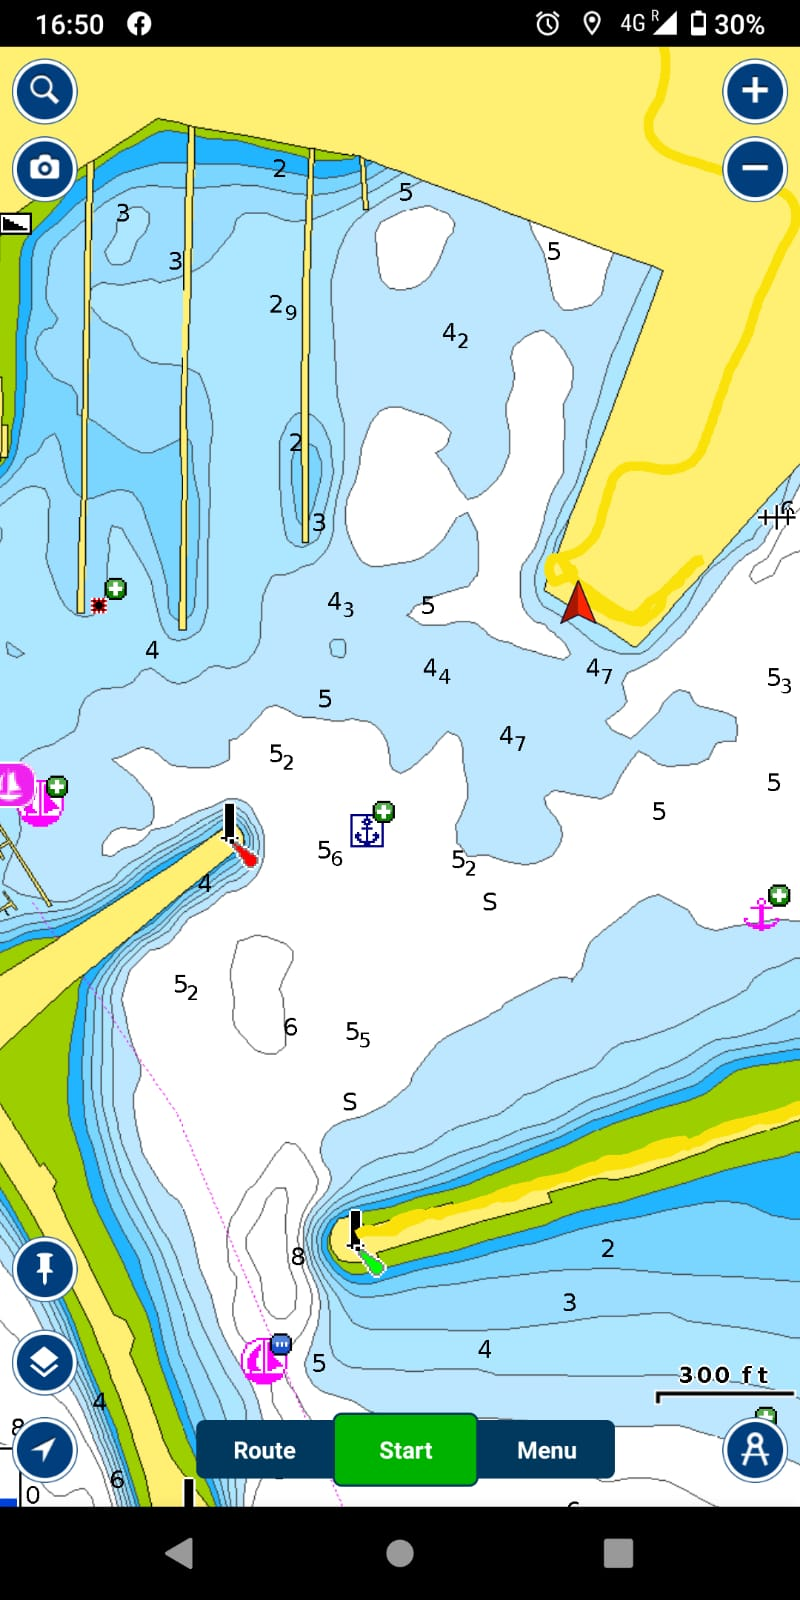

In [2]:
import pandas as pd
import statsmodels.formula.api as smf  # module to run ordinary least squares analysis
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.DataFrame(columns=['water_level_cm', 'pressure_mb'])
df.loc[0] = [0, 1017]
df.loc[1] = [100, 1110]
df.loc[2] = [200, 1211]
df.loc[3] = [300, 1308]
df.loc[4] = [400, 1408]
df.head()

,water_level_cm,pressure_mb
0,0,1017
1,100,1110
2,200,1211
3,300,1308
4,400,1408


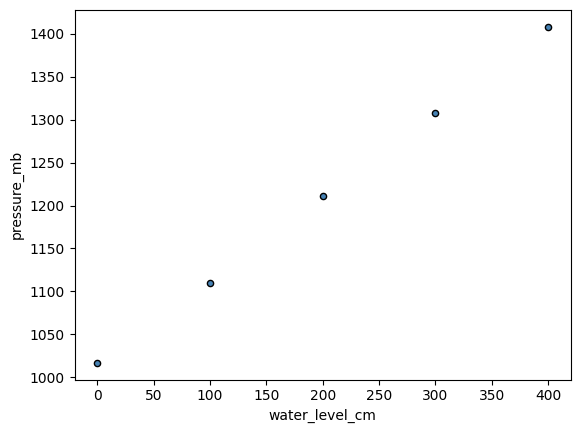

In [4]:
_ = df.plot.scatter(x='water_level_cm', y='pressure_mb', color = 'steelblue', edgecolor = 'black')

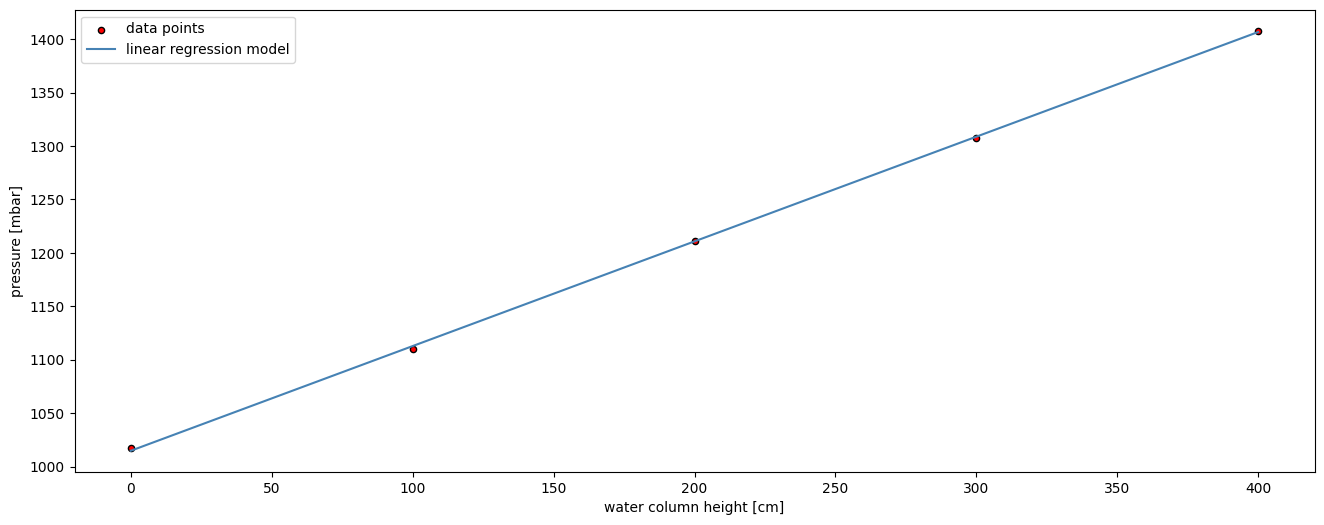

In [5]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)

linfit = smf.ols(formula=' pressure_mb ~ water_level_cm', data=df).fit()
intercept, slope = linfit.params

plt.scatter(x=df['water_level_cm'],y=df['pressure_mb'],s=20,alpha=1,marker='o', color = 'red', edgecolor = 'black',  label  = 'data points')
x = np.linspace(df['water_level_cm'].min(), df['water_level_cm'].max(), 100)
y = intercept + slope*x
ax.plot(x,y, 'steelblue', label = 'linear regression model')
ax.set_ylabel('pressure [mbar]')
ax.set_xlabel('water column height [cm]')
_= ax.legend()

In [6]:
linfit.summary()

/home/anna/.local/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pressure_mb   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.947e+04
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           8.12e-07
Time:                        21:29:27   Log-Likelihood:                -9.8077
No. Observations:                   5   AIC:                             23.62
Df Residuals:                       3   BIC:                             22.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1014.8000      1.720    589.841      0.000    1009.325    1020.275
water_level_cm     0.9800      0.007    139.526      0.000       0.958       1.002
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.635
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.341
Skew:                          -0.396   Prob(JB):                        0.843
Kurtosis:                       1.995   Cond. No.                         424.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""